In [223]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH)

In [282]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [306]:
from implementations import preprocess
tX_train, ty_train, tX_test, ty_test, cont_cols = preprocess(X_train, y_train, X_test, encodable_threshold=0)

In [307]:
tX_train.shape, tX_test.shape

((250000, 35), (568238, 35))

In [296]:
from implementations import logistic_regression_cv
weights, loss, lambda_, degree, accuracy, f1 = logistic_regression_cv(ty_train, tX_train, cont_cols=cont_cols, verbose=False)

Best Accuracy : 71.3685% reached at epoch 99
Best Accuracy : 71.11800000000001% reached at epoch 99
Best Accuracy : 70.49499999999999% reached at epoch 99
Best Accuracy : 71.662% reached at epoch 99
Best Accuracy : 69.922% reached at epoch 99
Best Accuracy : 72.0095% reached at epoch 99
Best Accuracy : 70.56949999999999% reached at epoch 99
Best Accuracy : 71.816% reached at epoch 99
Best Accuracy : 71.58250000000001% reached at epoch 99
Best Accuracy : 71.456% reached at epoch 99
Best Accuracy : 69.896% reached at epoch 99
Best Accuracy : 71.316% reached at epoch 99
Best Accuracy : 69.51899999999999% reached at epoch 99
Best Accuracy : 71.119% reached at epoch 99
Best Accuracy : 70.487% reached at epoch 99
Best Accuracy : 71.7565% reached at epoch 81
Best Accuracy : 71.1895% reached at epoch 99
Best Accuracy : 71.143% reached at epoch 98
Best Accuracy : 71.185% reached at epoch 99
Best Accuracy : 71.5565% reached at epoch 69
Best Accuracy : 69.45599999999999% reached at epoch 45
Best 

In [297]:
weights, loss, lambda_, degree, accuracy, f1

(array([[ 0.24183977],
        [-0.26544805],
        [ 0.37138584],
        [ 0.30515328],
        [ 0.91327956],
        [ 0.17158336],
        [ 0.53986589],
        [-0.36120854],
        [ 0.19929079],
        [ 0.35773507],
        [-0.06072972],
        [ 0.29187704],
        [ 0.12951111],
        [ 0.11767485],
        [ 0.33113117],
        [ 0.20211105],
        [ 0.23329362],
        [-0.09106707],
        [ 0.21601779],
        [-0.04322265],
        [-0.05206696],
        [ 0.23535913],
        [ 0.1280109 ],
        [ 0.27909552],
        [-0.22777135],
        [ 0.03490579],
        [-0.60286866],
        [ 0.16207475],
        [-0.32180454],
        [-0.01908622],
        [-0.02063272],
        [-0.01574469],
        [ 0.31183612],
        [-0.03238049],
        [-0.04039736],
        [ 0.07057688],
        [ 0.02495367],
        [-0.17392018],
        [ 0.02440933],
        [-0.00554544],
        [-0.10049804],
        [-0.03536644],
        [-0.26242361],
        [-0

Iteration 0/1000
Accuracy = 34.28%
Loss = 6.553596071063578


Iteration 10/1000
Accuracy = 59.205200000000005%
Loss = 1.4241444661980058


Iteration 20/1000
Accuracy = 66.754%
Loss = 0.8678075379235216


Iteration 30/1000
Accuracy = 68.7688%
Loss = 0.7323285444073929


Iteration 40/1000
Accuracy = 70.456%
Loss = 0.6423609852661826


Iteration 50/1000
Accuracy = 72.1308%
Loss = 0.5831094012354116


Iteration 60/1000
Accuracy = 73.66120000000001%
Loss = 0.5442413431628939


Iteration 70/1000
Accuracy = 74.99040000000001%
Loss = 0.5183459331903096


Iteration 80/1000
Accuracy = 76.0272%
Loss = 0.5006872535966626


Iteration 90/1000
Accuracy = 76.8432%
Loss = 0.48844500430059234


Iteration 100/1000
Accuracy = 77.422%
Loss = 0.4798351283071654


Iteration 110/1000
Accuracy = 77.8452%
Loss = 0.4737060900011065


Iteration 120/1000
Accuracy = 78.2252%
Loss = 0.4693243317826708


Iteration 130/1000
Accuracy = 78.4676%
Loss = 0.4661643137899054


Iteration 140/1000
Accuracy = 78.5768%
Loss = 0

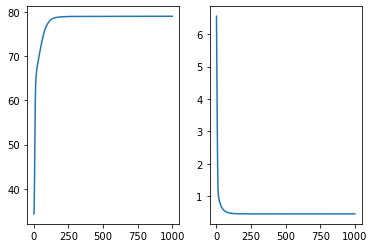

In [309]:
from implementations import logistic_regression, build_poly
tX_train_poly = build_poly(tX_train, degree, cont_cols)
loss, weights = logistic_regression(ty_train, tX_train_poly, max_iters=1000, lambda_=lambda_, verbose=True)

In [299]:
tX_test.shape

(568238, 34)

In [300]:
from implementations import build_poly
tX_test = build_poly(tX_test, degree, cont_cols)

In [301]:
tX_test.shape

(568238, 48)

In [302]:
from datetime import datetime
from implementations import predict
method = 'logistic_regression'
time = datetime.now().strftime('%Y%m%dH%H%M%S')
OUTPUT_PATH = f'submissions/submission_{method}_{time}' # TODO: fill in desired name of output file for submission
y_pred = predict(weights, tX_test)
y_pred[np.where(y_pred == 0)] = -1
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [52]:
corrs = []
for i in range(tX.shape[1]):
    corrs.append(np.corrcoef(tX[:, i], y)[0, 1])

In [53]:
sorted(corrs)

[-0.3514279558616751,
 -0.19539789618287817,
 -0.031947586805348205,
 -0.015287426687781413,
 -0.014055273784852506,
 -0.0044025386863883985,
 -0.0009432510582117487,
 0.0015162353770597236,
 0.0041254474115248515,
 0.0074753421885902374,
 0.012245481285482902,
 0.02246575151078583,
 0.13354912308169134,
 0.13429572666925302,
 0.1355202615226846,
 0.14055440046509557,
 0.1407143669504368,
 0.14125568650533774,
 0.1412649137760153,
 0.14134598859646297,
 0.1416459925656641,
 0.15046803779292678,
 0.15046926004977906,
 0.1532359324758135,
 0.15760414567634926,
 0.19176608807477077,
 0.19252632856874796,
 0.23523797587836723,
 0.23914905789154473,
 0.2717518770516493]